<a href="https://colab.research.google.com/github/lth01/DAP_termproject-1/blob/master/dap_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SLP_price,Ethereum_price,axie_price,Player_count 가 모여있는 csv파일 import

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#import packages

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/lth01/DAP_termproject-1/master/preprocessing.csv')
df.describe()
df.head()

#index는 datetime으로 이루어져있음, 2021-11-16~ 2021-11-30 까지의 데이터로 분류진행.

,Unnamed: 0,SLP_price,Axie_price,Ether_price,Player_count
0,2021-11-16 16:40:00,0.067343,164650.0,5280000.0,111140.0
1,2021-11-16 16:41:00,0.067334,164450.0,5280000.0,110228.0
2,2021-11-16 16:42:00,0.067334,164600.0,5283000.0,110822.0
3,2021-11-16 16:43:00,0.067297,164600.0,5281000.0,110305.0
4,2021-11-16 16:44:00,0.067297,164600.0,5281000.0,110968.0


실제 csv파일을 보게되면, 웹에서 실시간 데이터를 가져오다가 갑작스런 오류로 일정시간동안 측정을하지 못해 nan표시가 되어있는 col값을 볼수 있습니다.

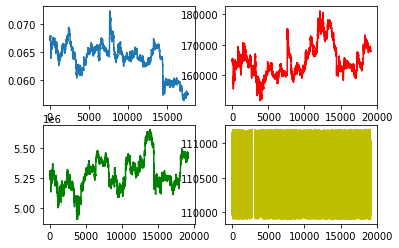

In [15]:
df.rename(columns = {'Unnamed: 0':'Date'},inplace=True)
plt.subplot(221)
plt.plot(df.index,df['SLP_price'])
plt.subplot(222)
plt.plot(df.index,df['Axie_price'],'r')
plt.subplot(223)
plt.plot(df.index,df['Ether_price'],'g')
plt.subplot(224)
plt.plot(df.index,df['Player_count'],'y')

plt.show()

#아무런 추가 전처리 없이 그래프를 그렸을때 보여지는 모습.
#접속중인 player_count가 높아졌다 낮아졌다를 계속해서 반복하므로, 정상적인 그래프가 그려지지 않는다.(즉 날짜별로는 그래프가 증가하거나 감소하지 않고 그저 진동한다.)
#date로 표시할경우 에러 발생


관계 분석, 그래프를 정확히 그리기 위해, 시계열 날짜 기준으로 보간

In [25]:
df['SLP_price']=pd.Series(df['SLP_price']).interpolate(method='time')
df['Player_count']=pd.Series(df['Player_count']).interpolate(method='time')
df['Ether_price']=pd.Series(df['Ether_price']).interpolate(method='time')
df['Axie_price']=pd.Series(df['Axie_price']).interpolate(method='time')



#reference  출처: https://rfriend.tistory.com/264
 

다음과 같이 값을 채우고 나서, 실제로 각각의 correlation 값이 어떤지 확인해보자.

              SLP_price  Axie_price  Ether_price  Player_count    rownum
SLP_price      1.000000    0.089363     0.212123      0.011985 -0.728051
Axie_price     0.089363    1.000000     0.658834     -0.028509  0.373931
Ether_price    0.212123    0.658834     1.000000     -0.030434  0.363866
Player_count   0.011985   -0.028509    -0.030434      1.000000 -0.043408
rownum        -0.728051    0.373931     0.363866     -0.043408  1.000000


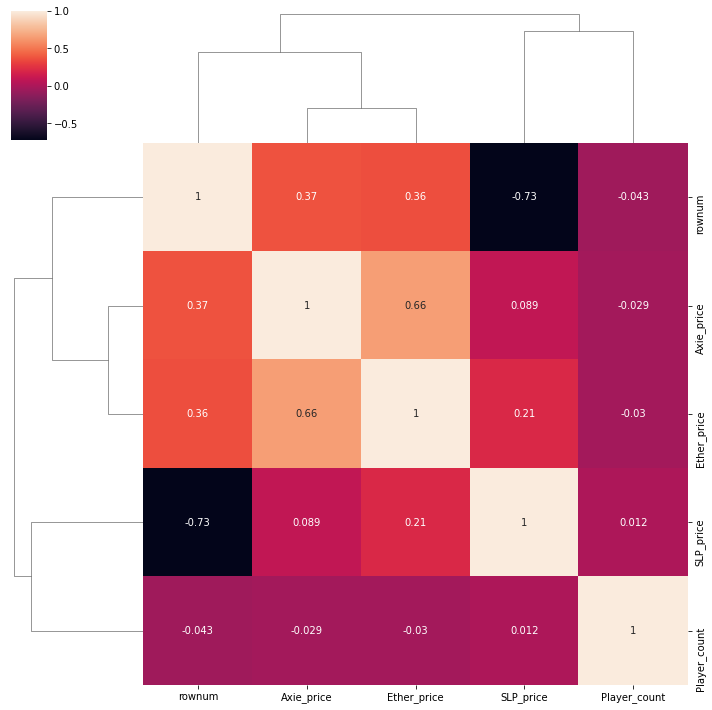

In [33]:
correlation=df.corr()
print(correlation)

sns.clustermap(correlation,annot=True)

#corr_data=df.pivot("SLP_price","Player_count","Ether_price","Axie_price")

#참고 자료: https://m.blog.naver.com/kiddwannabe/221763497317 


다음 heatmap을 보면, player_count와 다른 코인가격과는 거의 0에 가까운 상관 관계를 가짐을 볼 수 있다.